# Testing of our point control sim

We'll make a basic simulator control loop (what the BRAIN trainer will do), and plot the output. Then we'll be able to use the same tools to visualize the learned policies.

In [4]:
%matplotlib inline

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from bonsai_ai import Simulator, Config, Brain

In [8]:
import move_a_point_sim as sim

In [9]:
def run_sim_episode(sim, policy):
    """
    Given a sim and a policy, step through some iterations 
    of the simulator, returning the history of states.
    
    Args:
        sim: a PointSimulator
        policy: a function (SimState -> action dictionary)
    """
    k = 0 # Count steps, break out of infinite loops
    state_history = []
    reward_history = []
    state = sim.episode_start()
    state_history.append(state)

    is_terminal = False
    
    while not is_terminal:
        action = policy(state)
        # convert to a [-1,1] action
        #action['direction_radians'] = action['direction_radians'] / math.pi - 1.0
        (state, reward, is_terminal) = sim.simulate(action)
        state_history.append(state)
        reward_history.append(reward)
        k += 1
        if k > 1000:
            raise Exception("Simulation ran longer than 1000 steps. Stopping.")

    return state_history, reward_history

In [10]:
# Some silly policies
def random_policy(state):
    """
    Ignore the state, move randomly.
    """
    return {'direction_radians': random.random() * 2 * math.pi}

def go_up_policy(state):
    return {'direction_radians': math.pi / 2.0}

In [11]:
config = Config()
brain = Brain(config)
point_sim = sim.PointSimulator(brain, "move_a_point_sim")

states, rewards = run_sim_episode(point_sim, random_policy)

In [12]:
states[0]

{'dx': 0.24976389805026533, 'dy': 0.5115264976907996}

In [13]:
def plot_state_history(states):
    target = states[0]['dx'], states[0]['dy']
    
    xs = [target[0] - s['dx'] for s in states]
    ys = [target[1] - s['dy'] for s in states]

    fig, axes = plt.subplots(1,1)
    #data = np.random.random([10, 2]) 
    
    # Pull out colors
    colors = np.linspace(0.1, 1, len(states))
    mymap = plt.get_cmap("Blues")
    # get the colors from the color map
    my_colors = mymap(colors)
    axes.scatter(xs, ys, s=40,
                     c=colors, edgecolors='None',
                     cmap=mymap)
    
    # Plot the target point in orange
    axes.scatter(target[0], target[1], s=40, c='orange', edgecolors='None')
    
    def bounds(lst):
        eps = 0.05
        return min(lst+[0])-eps, max(lst+[1])+eps
        
    axes.set_xlim(bounds(xs + [target[0]]))
    axes.set_ylim(bounds(ys + [target[1]]))
    

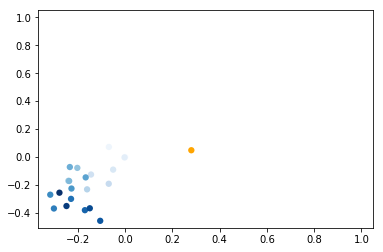

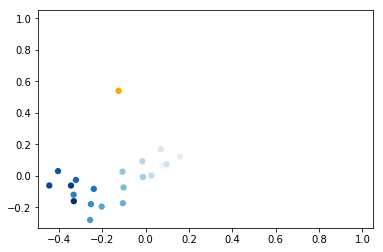

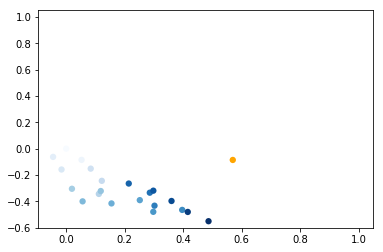

In [14]:
for i in range(3):
    states, rewards = run_sim_episode(point_sim, random_policy)
    plot_state_history(states)

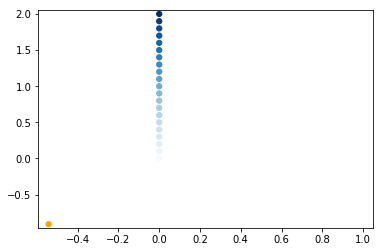

In [15]:
# Let's try the "go up" policy:
states, rewards = run_sim_episode(point_sim, go_up_policy)
plot_state_history(states)

In [16]:
states

[{'dx': -0.5424105768543129, 'dy': -0.9103367427394767},
 {'dx': -0.5424105768543129, 'dy': -1.0103367427394767},
 {'dx': -0.5424105768543129, 'dy': -1.1103367427394768},
 {'dx': -0.5424105768543129, 'dy': -1.210336742739477},
 {'dx': -0.5424105768543129, 'dy': -1.310336742739477},
 {'dx': -0.5424105768543129, 'dy': -1.410336742739477},
 {'dx': -0.5424105768543129, 'dy': -1.5103367427394772},
 {'dx': -0.5424105768543129, 'dy': -1.6103367427394772},
 {'dx': -0.5424105768543129, 'dy': -1.7103367427394773},
 {'dx': -0.5424105768543129, 'dy': -1.8103367427394774},
 {'dx': -0.5424105768543129, 'dy': -1.9103367427394775},
 {'dx': -0.5424105768543129, 'dy': -2.0103367427394776},
 {'dx': -0.5424105768543129, 'dy': -2.1103367427394777},
 {'dx': -0.5424105768543129, 'dy': -2.2103367427394778},
 {'dx': -0.5424105768543129, 'dy': -2.310336742739478},
 {'dx': -0.5424105768543129, 'dy': -2.410336742739478},
 {'dx': -0.5424105768543129, 'dy': -2.510336742739478},
 {'dx': -0.5424105768543129, 'dy': -2

In [17]:
rewards

[-2.7409940317708017,
 -2.7802299704686453,
 -2.81156752046153,
 -2.836901105668831,
 -2.8576155318337584,
 -2.8747334623821565,
 -2.8890186252990038,
 -2.901047952533359,
 -2.9112622314478545,
 -2.920001941716598,
 -2.9275328479596254,
 -2.934064462495142,
 -2.9397635039251426,
 -2.944763810289505,
 -2.9491737153833366,
 -2.953081591703567,
 -2.956560055262573,
 -2.9596691842623315,
 -2.9624590042098156,
 0]

In [18]:
def near_optimal(state):
    dx, dy = state['dx'], state['dy']
    return {'direction_radians': math.atan2(dy, dx) % (2 * math.pi)}

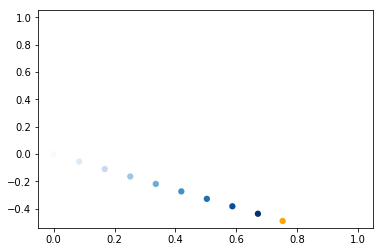

In [19]:
# Let's try the "go up" policy:
states, rewards = run_sim_episode(point_sim, near_optimal)
plot_state_history(states)

In [20]:
states

[{'dx': 0.7522438536560546, 'dy': -0.4881978285599836},
 {'dx': 0.6683607538522178, 'dy': -0.4337586370955656},
 {'dx': 0.584477654048381, 'dy': -0.3793194456311476},
 {'dx': 0.5005945542445442, 'dy': -0.3248802541667297},
 {'dx': 0.41671145444070734, 'dy': -0.27044106270231183},
 {'dx': 0.3328283546368705, 'dy': -0.21600187123789394},
 {'dx': 0.24894525483303365, 'dy': -0.16156267977347605},
 {'dx': 0.16506215502919686, 'dy': -0.10712348830905816},
 {'dx': 0.08117905522535995, 'dy': -0.052684296844640266}]

In [21]:
rewards

[1.0000000000000018,
 0.9999999999999996,
 0.9999999999999996,
 1.0000000000000004,
 1.0000000000000004,
 1.0000000000000004,
 0.9999999999999989,
 12]

# Next step: RL!

Now it's time to go write some inkling code to connect the simulator to a BRAIN. Then we'll train it.